In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.datasets import load_wine

In [7]:
data = load_wine(as_frame=True)

# 1. k = 1일 때 항상 train dataset에 대한 accurcy를 제시하고 그 이유에 대해 설명하시오

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size= 0.2, random_state = 42)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn_clf1 = KNeighborsClassifier(weights='uniform', n_neighbors=1, metric = "manhattan")

In [11]:
knn_clf1.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [12]:
y_train_pred = knn_clf1.predict(X_train)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

1.0

##  
k 값이 1인 경우, 예측을 수행할 때 주어진 데이터 포인트와 가장 가까운 이웃 데이터 포인트 하나만을  
고려하여 예측을 수행합니다. 이때, 해당 데이터 포인트는 그 자신이므로 정확하게 일치하게 됩니다.  
따라서 k가 1인 경우에는 항상 가장 가까운 이웃 데이터 포인트가 자기 자신이므로 정확도 (accuracy)는  
1.0이 된다.

# 2. k = train dataset의 수와 동일할 때 Knn이 어떻게 예측하는지 정확도를 제시하고 그러한 이유에 대해서 설명하시오

In [14]:
k = len(X_train)

In [15]:
knn_clf2 = KNeighborsClassifier(weights='uniform', n_neighbors=k, metric="manhattan")

In [16]:
knn_clf2.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=142)

In [17]:
y_train_pred2 = knn_clf2.predict(X_train)

In [18]:
accuracy_score(y_train, y_train_pred2)

0.4014084507042254

In [19]:
from collections import Counter

label_counts = Counter(y_train)

for label, count in label_counts.items():
    print(f"레이블 {label}의 빈도: {count}개")
len(y_train)

레이블 2의 빈도: 40개
레이블 1의 빈도: 57개
레이블 0의 빈도: 45개


142

In [20]:
57/142

0.4014084507042254

## 
이유 : knn은 가까운거리에 k개의 인스턴스의 클래스를 다수결에 의해서 특정 인스턴스의 클래스를 결정한다.  
k = train dataset의 수와 동일할때 accurcy는 train dataset을 구성하고있는 전체 인스턴스들의 클래스중에서  가장 많은 수를 차지하는 클래스의 비율이 된다.  
y_train 레이블 2의 빈도: 40개, 레이블 1의 빈도: 57개, 레이블 0의 빈도: 45개  
57/142 = 0.4014....

# 3. Cross validation을 활용하여 1 ~ 50 까지 k에 대한 train dataset의 정확도의 변화를 그래프로 시각화하시오 (Cross validation은 5로 고정) 

In [21]:
from sklearn.model_selection import cross_val_score
X, y = data.data, data.target
knn = KNeighborsClassifier(weights='uniform', metric = "manhattan")

# K 값 후보 리스트
k_values = list(range(1, 51))
acc = []
# 교차 검증 수행
for k in k_values:
    knn.n_neighbors = k  # KNN 모델의 이웃 수(k) 설정
    scores = cross_val_score(knn, data.data, data.target, cv=5)  # 5-Fold Cross Validation
    mean_accuracy = scores.mean()
    acc.append(mean_accuracy)
    print(f"K={k}, 평균 정확도: {mean_accuracy:f}")


K=1, 평균 정확도: 0.809365
K=2, 평균 정확도: 0.747937
K=3, 평균 정확도: 0.759048
K=4, 평균 정확도: 0.731111
K=5, 평균 정확도: 0.719365
K=6, 평균 정확도: 0.747619
K=7, 평균 정확도: 0.764444
K=8, 평균 정확도: 0.708413
K=9, 평균 정확도: 0.775556
K=10, 평균 정확도: 0.764127
K=11, 평균 정확도: 0.747302
K=12, 평균 정확도: 0.775556
K=13, 평균 정확도: 0.758571
K=14, 평균 정확도: 0.764444
K=15, 평균 정확도: 0.770000
K=16, 평균 정확도: 0.753175
K=17, 평균 정확도: 0.747302
K=18, 평균 정확도: 0.742063
K=19, 평균 정확도: 0.736190
K=20, 평균 정확도: 0.725238
K=21, 평균 정확도: 0.725079
K=22, 평균 정확도: 0.708413
K=23, 평균 정확도: 0.736190
K=24, 평균 정확도: 0.725079
K=25, 평균 정확도: 0.719524
K=26, 평균 정확도: 0.713810
K=27, 평균 정확도: 0.725079
K=28, 평균 정확도: 0.725238
K=29, 평균 정확도: 0.730794
K=30, 평균 정확도: 0.725238
K=31, 평균 정확도: 0.719683
K=32, 평균 정확도: 0.719841
K=33, 평균 정확도: 0.730952
K=34, 평균 정확도: 0.725397
K=35, 평균 정확도: 0.730952
K=36, 평균 정확도: 0.719841
K=37, 평균 정확도: 0.725397
K=38, 평균 정확도: 0.719841
K=39, 평균 정확도: 0.713968
K=40, 평균 정확도: 0.719841
K=41, 평균 정확도: 0.714127
K=42, 평균 정확도: 0.714286
K=43, 평균 정확도: 0.719841
K=44, 평균 정확도: 0.7200

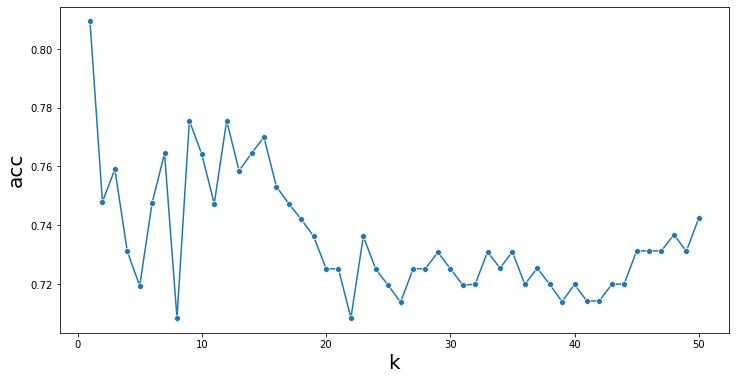

In [22]:
# 결과 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x=k_values, y=acc, marker="o")
plt.xlabel("k",fontsize = 20)
plt.ylabel("acc", fontsize = 20)
# plt.xticks(k_values)
plt.show()

In [23]:
sort_acc = np.argsort(acc)[::-1]

In [24]:
sort_acc_index = []
for i in sort_acc:
    sort_acc_index.append(i+1)
print(f"확률이 높은 K 순서: {sort_acc_index[:]}")

확률이 높은 K 순서: [1, 9, 12, 15, 7, 14, 10, 3, 13, 16, 2, 6, 17, 11, 50, 18, 48, 19, 23, 47, 46, 45, 49, 4, 35, 33, 29, 34, 37, 20, 28, 30, 24, 27, 21, 44, 43, 40, 32, 38, 36, 31, 25, 5, 42, 41, 39, 26, 8, 22]


# 4. 다양하게 하이퍼 파라미터와 scaler 등을 조절하여 최고의 성능을 제시하시오. (Cross validation의 수는 5로 고정) , 하이퍼파라미터와 test set에 대한 정확도 제시

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
std_scaler = StandardScaler()
std_scaler.fit(X_train)
x_scaled = std_scaler.transform(X_train)

In [28]:
x_scaled

array([[ 1.66529275, -0.60840587,  1.21896194, ..., -1.65632857,
        -0.87940904, -0.24860607],
       [-0.54952506,  2.7515415 ,  1.00331502, ..., -0.58463272,
        -1.25462095, -0.72992237],
       [-0.74531007, -1.14354109, -0.93750727, ...,  0.35845962,
         0.2462267 , -0.24860607],
       ...,
       [ 1.714239  , -0.44172441,  0.06884503, ...,  1.04434496,
         0.56585166,  2.69572196],
       [-0.35374006, -0.7399965 , -0.36244882, ...,  0.01551695,
        -0.74044166, -0.79631083],
       [-0.78201975,  0.06709269,  0.35637426, ..., -0.67036839,
         1.09392769, -0.98551793]])

In [30]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(weights='uniform', metric = "manhattan")

# K 값 후보 리스트
k_values = list(range(1, 114))
acc = []
# 교차 검증 수행
for k in k_values:
    knn.n_neighbors = k  # KNN 모델의 이웃 수(k) 설정
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-Fold Cross Validation
    mean_accuracy = scores.mean()
    acc.append(mean_accuracy)
    print(f"K={k}, 평균 정확도: {mean_accuracy:f}")


K=1, 평균 정확도: 0.795320
K=2, 평균 정확도: 0.732759
K=3, 평균 정확도: 0.704680
K=4, 평균 정확도: 0.712069
K=5, 평균 정확도: 0.718227
K=6, 평균 정확도: 0.738670
K=7, 평균 정확도: 0.732266
K=8, 평균 정확도: 0.746305
K=9, 평균 정확도: 0.739163
K=10, 평균 정확도: 0.725616
K=11, 평균 정확도: 0.732266
K=12, 평균 정확도: 0.746798
K=13, 평균 정확도: 0.732759
K=14, 평균 정확도: 0.739901
K=15, 평균 정확도: 0.732512
K=16, 평균 정확도: 0.718719
K=17, 평균 정확도: 0.725616
K=18, 평균 정확도: 0.725616
K=19, 평균 정확도: 0.697291
K=20, 평균 정확도: 0.718473
K=21, 평균 정확도: 0.711084
K=22, 평균 정확도: 0.704433
K=23, 평균 정확도: 0.711576
K=24, 평균 정확도: 0.711576
K=25, 평균 정확도: 0.711576
K=26, 평균 정확도: 0.718719
K=27, 평균 정확도: 0.711576
K=28, 평균 정확도: 0.718473
K=29, 평균 정확도: 0.704433
K=30, 평균 정확도: 0.704433
K=31, 평균 정확도: 0.704433
K=32, 평균 정확도: 0.697537
K=33, 평균 정확도: 0.704680
K=34, 평균 정확도: 0.690394
K=35, 평균 정확도: 0.711576
K=36, 평균 정확도: 0.718966
K=37, 평균 정확도: 0.711823
K=38, 평균 정확도: 0.704680
K=39, 평균 정확도: 0.711823
K=40, 평균 정확도: 0.711823
K=41, 평균 정확도: 0.711823
K=42, 평균 정확도: 0.718966
K=43, 평균 정확도: 0.732759
K=44, 평균 정확도: 0.7118

In [31]:
acc_scaled = []
models = []
for k in range(1, 114):

    std_scaler = StandardScaler()
    knn = KNeighborsClassifier(weights='uniform', n_neighbors=k)
    Knn_pipe = Pipeline([
          ("std_scaler", std_scaler),
          ("knn", knn),
      ])

    scores_scaled = cross_val_score(Knn_pipe, x_scaled, y_train, cv=5)
    mean_scaled_accuracy = scores_scaled.mean()
    acc_scaled.append(mean_scaled_accuracy)
    models.append(Knn_pipe)
    print(f"K={k}, 평균 정확도: {mean_scaled_accuracy:f}")

K=1, 평균 정확도: 0.950493
K=2, 평균 정확도: 0.943842
K=3, 평균 정확도: 0.950739
K=4, 평균 정확도: 0.950493
K=5, 평균 정확도: 0.957882
K=6, 평균 정확도: 0.950985
K=7, 평균 정확도: 0.950739
K=8, 평균 정확도: 0.943842
K=9, 평균 정확도: 0.943842
K=10, 평균 정확도: 0.936946
K=11, 평균 정확도: 0.950739
K=12, 평균 정확도: 0.943596
K=13, 평균 정확도: 0.943842
K=14, 평균 정확도: 0.957635
K=15, 평균 정확도: 0.957882
K=16, 평균 정확도: 0.950739
K=17, 평균 정확도: 0.957882
K=18, 평균 정확도: 0.957882
K=19, 평균 정확도: 0.957882
K=20, 평균 정확도: 0.957882
K=21, 평균 정확도: 0.965025
K=22, 평균 정확도: 0.957882
K=23, 평균 정확도: 0.965025
K=24, 평균 정확도: 0.957882
K=25, 평균 정확도: 0.957882
K=26, 평균 정확도: 0.957882
K=27, 평균 정확도: 0.957882
K=28, 평균 정확도: 0.957882
K=29, 평균 정확도: 0.957882
K=30, 평균 정확도: 0.950739
K=31, 평균 정확도: 0.950985
K=32, 평균 정확도: 0.950739
K=33, 평균 정확도: 0.950739
K=34, 평균 정확도: 0.950739
K=35, 평균 정확도: 0.943842
K=36, 평균 정확도: 0.957635
K=37, 평균 정확도: 0.957882
K=38, 평균 정확도: 0.957635
K=39, 평균 정확도: 0.957882
K=40, 평균 정확도: 0.964778
K=41, 평균 정확도: 0.957882
K=42, 평균 정확도: 0.964778
K=43, 평균 정확도: 0.957882
K=44, 평균 정확도: 0.9647

Text(0, 0.5, 'acc')

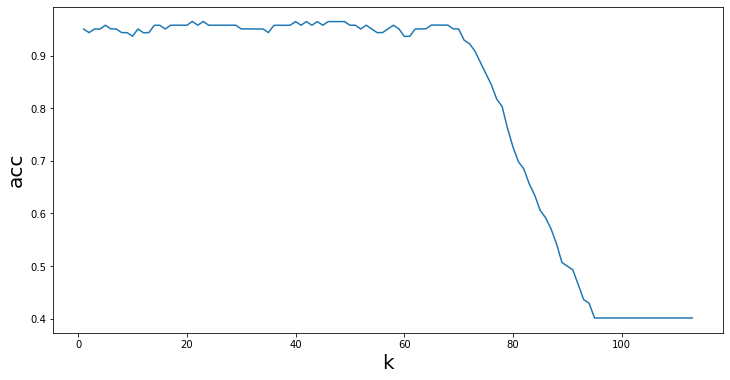

In [32]:
plt.figure(figsize=(12,6))
sns.lineplot(x = range(1,114), y = acc_scaled)
plt.xlabel("k",fontsize = 20)
plt.ylabel("acc", fontsize = 20)

Text(0, 0.5, 'acc')

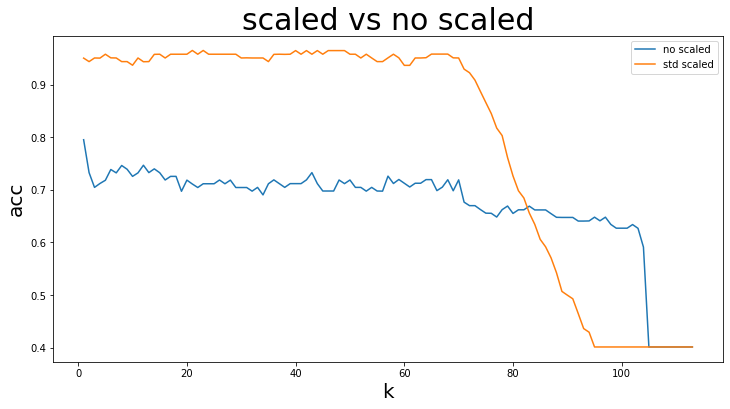

In [33]:
plt.figure(figsize=(12,6))
sns.lineplot(x = range(1,114), y = acc, label = "no scaled")
sns.lineplot(x = range(1,114), y = acc_scaled, label = "std scaled")
plt.title("scaled vs no scaled", fontsize = 30)
plt.xlabel("k",fontsize = 20)
plt.ylabel("acc", fontsize = 20)

In [36]:
best_k = np.argmax(np.array(acc_scaled))

In [37]:
print(f"best K : {best_k}")

best K : 20


In [38]:
models[best_k].fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=21))])

In [39]:
models[best_k].score(X_test,y_test)

0.9444444444444444